# Import Libraries

In [1]:
#If need to reimport something
def rel(name):
    importlib.reload(sys.modules[name])

In [2]:
import numpy as np
import pandas as pd
import sys, importlib
import matplotlib.pyplot as plt

In [3]:
import Evaluator


 # Build Data

In [4]:
from DataBuilder import DataBuilder

dataBuilder = DataBuilder()

100%|██████████| 3/3 [00:23<00:00,  7.72s/it]


# Bring in the algorithm

In [ ]:
from skLinearRegression import skLinearRegression
skLR = skLinearRegression()
model = skLR.model

# Plug the evaluator to LR grid

In [ ]:
#from Evaluator import Evaluator

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skLR.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
#Typical reload command
rel('skRandomForest')

# RandomForest Regressor

In [ ]:
rel('Evaluator')
from skRandomForest import skRandomForest
skRF = skRandomForest()
model = skRF.model

# Train RF

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skRF.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

# Gaussian Process Regression

In [ ]:
rel('skGaussianProcess')
rel('Evaluator')

from skGaussianProcess import skGaussianProcess

skGP = skGaussianProcess()
model = skGP.model

In [ ]:
for dataKey, confDict in dataBuilder.confs.items():
    for confKey, confData in confDict.items():
        evaluator  = Evaluator.Evaluator(skGP.name, dataKey, model, confKey, confData)
        evaluator.train_model()
        evaluator.evaluate()
        evaluator.store()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor()

In [ ]:
gp.get_params()

# Kmeans + RandomForest

## Test with the best conf, framesize random forest configuraions.

In [256]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from Evaluator import mean_absolute_percentage_error

skKM = KMeans(n_clusters=2,max_iter = 10000000)
confData = dataBuilder.confs['data1']['conf5']

train_cluster_indices = list()
test_cluster_indices = list()

skKM.fit(confData[0])
preds = skKM.transform(confData[0])
labels = skKM.labels_


In [257]:
# plt.scatter(confData[1],confData[1], c=['blue' if a ==0 else 'red' for a in labels], alpha = 0.1)
df = pd.DataFrame(data = np.hstack((confData[1], labels.reshape(-1,1))), columns = ['speed', 'label'])

In [258]:
clust1 = np.where(labels==0)
clust2 = np.where(labels==1)

X_Train1 = np.take(confData[0], clust1,axis=0)[0]
y_Train1 = np.take(confData[1], clust1,axis=0)[0]

X_Train2 = np.take(confData[0], clust2,axis=0)[0]
y_Train2 = np.take(confData[1], clust2,axis=0)[0]

In [259]:
preds = skKM.predict(confData[2])

In [260]:
c1 = np.where(preds==0)
c2 = np.where(preds==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

25.40893752492217
[0.3781115721255917, 0.6856370293533955, 25.40893752492217]


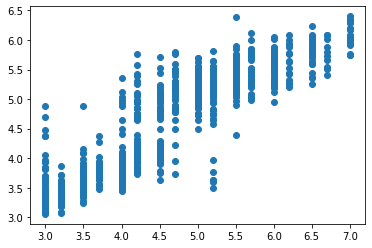

<Figure size 504x504 with 0 Axes>

In [265]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    #('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]
print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

25.995507966422473
[0.37500976044211437, 0.7141289335346783, 25.995507966422473]


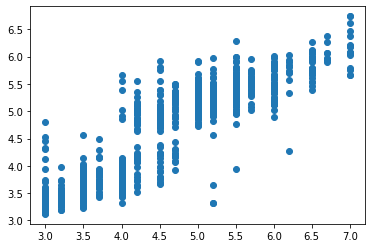

<Figure size 504x504 with 0 Axes>

In [266]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]

print(r2)
plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [268]:
print("Overall results for clustering + Regression : {}".format((r1+r2)/2))


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [275]:
(np.array(r1) + np.array(r2))/2

array([ 0.37656067,  0.69988298, 25.70222275])

# Classifier + RandomForest


In [278]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [279]:
confData = dataBuilder.confs['data1']['conf5']
s = 4.5

In [280]:
classes = np.array([0 if speed< s else 1 for speed in confData[1]])
cls1 = np.where(classes==0)
cls2 = np.where(classes==1)

X_Train1 = np.take(confData[0], cls1,axis=0)[0]
y_Train1 = np.take(confData[1], cls1,axis=0)[0]

X_Train2 = np.take(confData[0], cls2,axis=0)[0]
y_Train2 = np.take(confData[1], cls2,axis=0)[0]

In [281]:
clas = np.array([0 if speed< s else 1 for speed in confData[3]])

c1 = np.where(clas==0)
c2 = np.where(clas==1)

X_Test1 = np.take(confData[2], c1,axis=0)[0]
y_Test1 = np.take(confData[3], c1,axis=0)[0]

X_Test2 = np.take(confData[2], c2,axis=0)[0]
y_Test2 = np.take(confData[3], c2,axis=0)[0]

In [282]:
clf = svm.SVC()
clf.fit(confData[0],classes)

SVC()

In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(confData[2]), clas)

0.9051000645577792

11.471917544429715
[0.27431839581868395, -1.2920455958081165, 11.471917544429715]


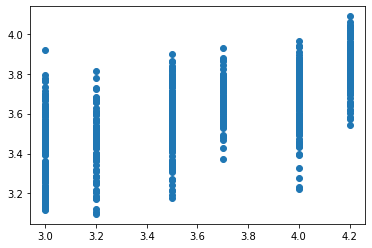

<Figure size 504x504 with 0 Axes>

In [284]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [
    ('pca',pca), 
    ('rf', rf)])


pipe.fit(X_Train1, y_Train1.flatten())

preds1 = pipe.predict(X_Test1)

r1 = [mean_absolute_error(preds1, y_Test1), r2_score(preds1, y_Test1), mean_absolute_percentage_error(preds1, y_Test1)]

print(r1)

plt.scatter(y_Test1,preds1)
plt.figure(figsize=(7,7))
plt.show()

11.46296024516818
[0.40275788650447686, -1.200023329450575, 11.46296024516818]


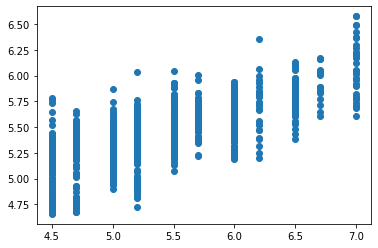

<Figure size 504x504 with 0 Axes>

In [285]:
pca = PCA(n_components=25)
rf = RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=8, n_estimators=250)

pipe = Pipeline(steps = [('rf', rf)])

pipe.fit(X_Train2, y_Train2.flatten())

preds2 = pipe.predict(X_Test2)

r2 = [mean_absolute_error(preds2, y_Test2), r2_score(preds2, y_Test2), mean_absolute_percentage_error(preds2, y_Test2)]
print(r2)

plt.scatter(y_Test2,preds2)
plt.figure(figsize=(7,7))
plt.show()

In [287]:
print("Overall results for clustering + Regression : {}".format((np.array(r1)+np.array(r2)/2)))

Overall results for clustering + Regression : [ 0.47569734 -1.89205726 17.20339767]
